## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo V - Redes neurais auto-associativas e geradoras</span>


### <span style="color:darkred">Avaliação (com soluções)</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

### Questão 1)

Qual a diferença entre um Autoencoder convencional (AE) e um Variational Autoencoder (VAE)?

(a) VAE aprende uma representação latente com base na comparação entre exemplos reais e exemplos gerados artificialmente, enquanto que o AE aprende apenas a partir de dados reais<br>
<font color='red'>(b) O espaço latente do VAE é composto por parâmetros de distribuições a partir dos quais são amostrados o exemplos a serem decodificados pelo elemento decoder, enquanto que o espaço latente do AE é aprendido sem assumir distribuições para suas dimensões.<br></font>
(c) O espaço latente do AE é composto por parâmetros de distribuições a partir dos quais são amostrados o exemplos a serem decodificados pelo elemento decoder, enquanto que o espaço latente do VAE é aprendido sem assumir distribuições para suas dimensões, permitindo que esse seja usado também como modelo gerador.<br>
(d) VAE aprende apenas a partir de dados reais, enquanto o AE aprende com base na comparação entre exemplos reais na entrada e exemplos gerados artificialmente em sua saída<br>

**Justificativa:** (a) e (d) são incorretas pois VAE e AE não aprendem a partir de exemplos gerados artificialmente, sendo a GAN o método que realiza essa abordagem, (c) é incorreta pois o AE não possui distribuições em seu espaço latente e sim o VAE

---
### Questão 2)


Considere os métodos Generative Adversarial Networks, Denoising Autoencoder e Variational Autoencoder. Podemos dizer que esses métodos se enquadram em qual tipo de paradigma aprendizado?

 (a) Supervisionado<br>
 (b) Semi-supervisionado<br>
 <font color='red'>(c) Não supervisionado</font><br>
 (d) Fracamente supervisionado<br>
 
 **Justificativa**: formalmente, esses métodos aprendem sem necessidade de supervisão no sentido de anotações extras para além dos próprios dados.

---
### Questão 3)

O objetivo principal no aprendizado de uma rede do tipo Generative Adversarial Network é

 <font color='red'>(a) Aprender as operações que permitem, a partir de um exemplo aleatório amostrado de uma determinada distribuição, gerar um exemplo que se assemelhe a uma amostra obtida da distribuição dos dados de treinamento</font><br>
 (b) Classificar exemplos fornecidos para a rede neural em exemplos advindos do conjunto de treinamento da base de dados de interesse, e exemplos que não pertençam a esse conjunto.<br>
 (c) Realizar uma regressão da distribuição de entrada para um espaço latente compacto e de menor dimensionalidade que a entrada, a partir do qual podemos reconstruir um exemplo de forma fiel com relação à sua dimensionalidade original<br>
 (d) Obter um modelo que aprenda a distribuição dos dados de entrada e que projete esses dados num espaço que seja robusto a possíveis ruídos em dados futuros, permitindo assim evitar ataques adversariais.<br>
 
  **Justificativa**: A alternativa (b) está errada pois, apesar de existir um elemento discriminador, essa classificação não é o objetivo principal, mas sim é usada como forma de guiar a rede a aprender a distribuição dos dados de treinamento a partir de operações que gerem dados semelhantes aos reais a partir de exemplos aleatórios. A alternativa (c) descreve um autoencoder e não uma GAN. A alternativa (d) inicia descrevendo um Denoising Autoencoder e finaliza afirmando que isso permite ataques adversariais o que não é verdade nem mesmo para Denoising Autoencoders.

---

### Questão 4)

Carregue a base de dados `wine.csv`, conforme abaixo, com uma divisão hold-out utilizando os 80% exemplos iniciais para treinamento e os restantes para teste. Utilizaremos apenas os exemplos de treinamento obtidos nessa separação.

Projete um Autoencoder para produzir um espaço de características com 5 dimensões, com as seguintes camadas:
* Entrada (com as dimensões da base de dados)
* Dropout de 0.25
* Camada densa de 5 neurônios (camada de código) e ativação relu
* Camada densa de saída (com as dimensões da base de dados) e ativação sigmoide

OBS: código é o nome que se dá à camada latente do Autoencoder, geralmente aquela contendo a maior restrição de dimensionalidade, que fornece um espaço de características compacto para os dados de entrada. Também chamamos de código as características obtidas a partir dessa camada.

Inicialize as sementes `seed(1)` e `set_seed(2)` antes de instanciar o modelo, compilar e treinar.

Utilize a função de custo mean absolute error (mse), otimizador Adam com taxa 0.0001, batchsize 10 e treine por 300 épocas.

Após o treinamento, obtenha as características a partir da camada "código" do Autoencoder (o modelo treinado nos dados de treinamento) e grafe um scatterplot das duas primeiras características do código de treinamento, analisando visualmente a distribuição desses dados com relação das classes. Podemos identificar qual distribuição dos dados em termos da separação e sobreposição de classes?

<font color='red'>(a) classe mais distintamente separada: 1, classes sobrepostas: 0 e 2<br></font>
(b) classe mais distintamente separada: 0, classes sobrepostas: 1 e 2 <br>
(c) classes mais distintamente separadas: 0, 1 e 2, classes sobrepostas: nenhuma<br>
(d) classe mais distintamente separada: 2, classes sobrepostas: 0 e 1 <br>

 **Justificativa**: Ver código abaixo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2021-10-27 11:40:48.317959: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
df = pd.read_csv("wine.csv")
df.dropna(inplace=True)
print(df.head())
classif = np.array(df['Class'].astype("category").cat.codes)
features = np.array(df.iloc[:, :-1])
print(features.shape)

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline Class  
0            

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, classif, test_size=0.20, random_state=0)
print("Exemplos de treinamento:", len(X_train))
print("Exemplos de teste:", len(X_test))

scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

Exemplos de treinamento: 142
Exemplos de teste: 36


In [85]:
### Projetar modelo de autoencoder

In [5]:
def autoencoder(input_dim, code_dim, dropout_rate=0.0):
    input_x = keras.layers.Input(shape=(input_dim,))
    x = keras.layers.Dropout(dropout_rate)(input_x)
    z = keras.layers.Dense(code_dim, activation='relu', name='code')(x)
    output_x = keras.layers.Dense(input_dim, activation='sigmoid')(z)
    autoencoder = keras.models.Model(input_x, output_x)
    return autoencoder

In [6]:
### definir sementes, instanciar AE, compilar e treinar

In [30]:
epochs = 300
batch_size = 10

seed(1)
set_seed(2)

code_dims = 5

# instanciar AE
# compilar AE
# treinar AE
autoencoder1 = autoencoder(X_train_n.shape[1], code_dims, dropout_rate=0.25)
autoencoder1.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0001))
hist1 = autoencoder1.fit(X_train_n, X_train_n, batch_size=batch_size, epochs=epochs, verbose=0)

In [31]:
# computa erro de treinamento
scores1 = autoencoder1.evaluate(X_train_n, X_train_n)

5/5 [==============================] - 0s 1ms/step - loss: 0.0366


In [32]:
### Obter características a partir da camada de código do autoencoder

In [33]:
code_model1 = keras.models.Model(inputs=autoencoder1.input, outputs=autoencoder1.get_layer('code').output)
code_train1 = np.asarray(code_model1.predict(X_train_n))

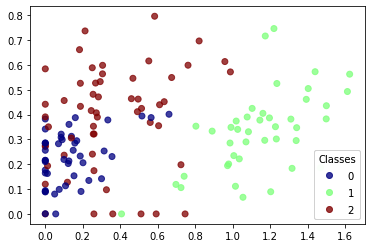

In [34]:
### Exibir as duas primeiras caracerísticas para análise visual
size_sample = len(X_train)
fig, ax = plt.subplots()
scatter = ax.scatter(code_train1[:size_sample,0], code_train1[:size_sample,1], c=y_train[:size_sample], alpha=0.75, cmap="jet")
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend1)

---

### Questão 5)

Carregue a base de dados `wine.csv`, conforme abaixo, com uma divisão hold-out utilizando os 80% exemplos iniciais para treinamento e os restantes para teste. 

Projete um Autoencoder profundo para produzir uma projeção em 3 dimensões, com as seguintes camadas:
* Entrada (com as dimensões originais da base de dados)
* Camada densas com 8 neurônios, ativação relu
* Camada densa com 3 neurônios (camada de código), ativação relu
* Dropout de 1/3.0 (um terço)
* Camada densas com 8 neurônios, ativação relu
* Camada densa de saída (com as dimensões originais da base de dados), ativação sigmóide

Inicialize as sementes `seed(1)` e `set_seed(2)` antes de instanciar o modelo, compilar e treinar (com o conjunto de treinamento).

Utilize a função de custo mean squared error (MSE), otimizador Adam com taxa 0.0001, batchsize 10 e treine por 300 épocas.

Após o treinamento:
1. Calcule o MSE (do autoencoder) no conjunto de teste
2. Obtenha as características a partir do código de 3 dimensões para o conjunto de treinamento e de teste. Treine um classificador SVM (utilizando `SVC(C=0.5, random_state=1, kernel="rbf")`) com o código de treinamento (3 dimensões). Calcule a acurácia obtida pelo SVM no conjunto de teste (utilizando as características obtidas a partir do autoencoder).

Os valores observados de MSE no teste do autoencoder, e acurácia de classificação SVM no teste estão em qual intervalo?

(a) MSE =[0.01, 0.08]; Acurácia = [0.73, 0.82] <br>
<font color='red'>(b) MSE =[0.01, 0.08]; Acurácia = [0.87, 0.98] <br></font>
(c) MSE =[0.10, 0.16]; Acurácia = [0.73, 0.82] <br>
(d) MSE =[0.10, 0.16]; Acurácia = [0.87, 0.98] <br>

 **Justificativa**: Ver código abaixo.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features, classif, test_size=0.20, random_state=0)
print("Exemplos de treinamento:", len(X_train))
print("Exemplos de teste:", len(X_test))

scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

Exemplos de treinamento: 142
Exemplos de teste: 36


In [78]:
def deep_autoencoder(neurons, input_dim, code_dim, n_layers=1, dropout_rate=0.0):
    
    input_data = keras.layers.Input(shape=(input_dim,))
    x = keras.layers.Dense(neurons, activation='relu')(input_data)
    z = keras.layers.Dense(code_dim, activation='relu', name='code')(x)
    z = keras.layers.Dropout(dropout_rate)(z)
    x = keras.layers.Dense(neurons, activation='relu')(z)
    output = keras.layers.Dense(input_dim, activation='sigmoid')(x)
    autoencoder = keras.models.Model(input_data, output)
    
    return autoencoder

In [79]:
epochs = 300
batch_size = 10
code_dims = 3

In [80]:
seed(1)
set_seed(2)
autoencoder2 = deep_autoencoder(8, X_train_n.shape[1], code_dims, 3, dropout_rate=1/3.0)
autoencoder2.summary()
autoencoder2.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0001))
hist2 = autoencoder2.fit(X_train_n, X_train_n, batch_size=batch_size,
                    epochs=epochs, verbose=0)

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 112       
_________________________________________________________________
code (Dense)                 (None, 3)                 27        
_________________________________________________________________
dropout_11 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_25 (Dense)             (None, 13)                117       
Total params: 288
Trainable params: 288
Non-trainable params: 0
____________________________________________________________

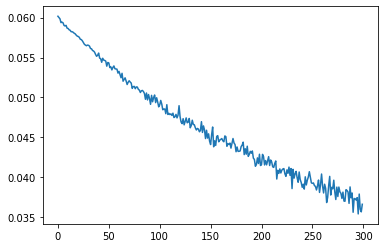

In [81]:
plt.plot(hist2.history['loss'])

In [82]:
scores2 = autoencoder2.evaluate(X_train_n, X_train_n, verbose=0)
print("MSE treinamento: %.4f" % (scores2))

scores3 = autoencoder2.evaluate(X_test_n, X_test_n, verbose=0)
print("MSE teste: %.4f" % (scores3))

MSE treinamento: 0.0331
MSE teste: 0.0343


In [83]:
code_modelae = keras.models.Model(inputs=autoencoder2.input, outputs=autoencoder2.get_layer('code').output)
code_train = np.asarray(code_modelae.predict(X_train_n))

Calculando score...

score: 0.94 


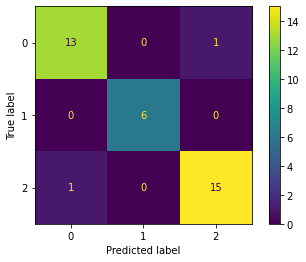

In [84]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

clf2 = svm.SVC(C=0.5, random_state=1, kernel="rbf")
clf2.fit(code_train, y_train)
code_test = np.asarray(code_modelae.predict(X_test_n))

print('Calculando score...')
score = clf2.score(code_test, y_test)
print('\nscore: %.2f ' % (score))

disp = plot_confusion_matrix(clf2, code_test, y_test)